In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [19]:
df_health = pd.read_csv("./insurance.csv")

In [20]:
# Convert to DataFrame
df_health = pd.DataFrame(df_health)
df_health.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [150]:
# Let's add the sample of who's got claim of insurance, we can randomize the each of data
# df_health['insuranceclaim'] = np.random.randint(2, size=len(df_health))
# df_health.head()

In [4]:
df_health.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df_health.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
row, col = df_health.shape

print(f"Total columns: {col}")
print(f"Total rows: {row}")


Total columns: 7
Total rows: 1338


In [8]:
nan_col = df_health.isnull().sum()[df_health.isnull().sum() > 0]

nan_col_list = pd.DataFrame({"NaN Count": nan_col, "NaN Percentage": nan_col / len(df_health)}).sort_values(by ="NaN Percentage", ascending = False)

nan_col_list

,NaN Count,NaN Percentage


In [22]:
# Detect Skewness
cols = df_health.drop(['charges','smoker','sex','region'],axis=1)
for column in cols.columns:
    sek = df_health[column].skew()
    if(sek < 0) :
        sek = -sek 
    print(sek)
    if sek == 0:
        print ('Normal')
    elif -0.5 <= sek <= 0.5:
        print(column + ' Approximately Symmetric')
    elif sek >= 1 or sek <= 1:
        print(column + ' Skewed')
        
# smoker and children columns are skewed 

0.05567251565299186
age Approximately Symmetric
0.2840471105987448
bmi Approximately Symmetric
0.9383804401702414
children Skewed


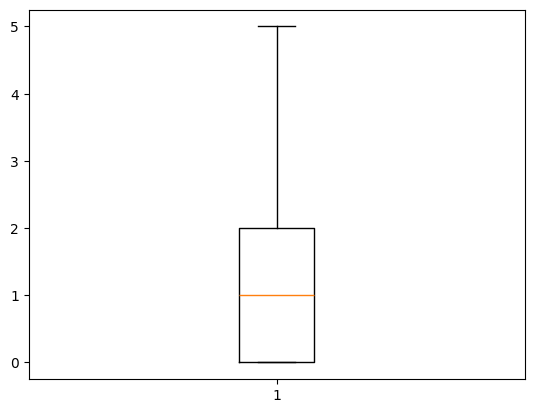

<Figure size 1000x700 with 0 Axes>

In [21]:
plt.boxplot(df_health['children'])
fig = plt.figure(figsize =(10, 7))
plt.show()  # so it is here show that it is valid data not by mistake 

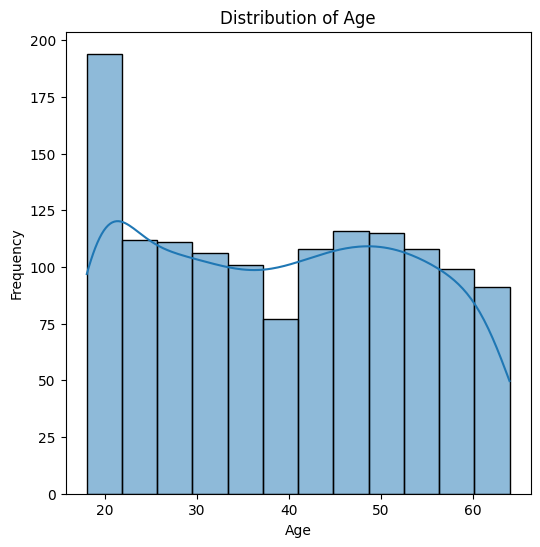

In [12]:
# Plot the distribution of age
plt.figure(figsize=(6, 6))
sns.histplot(df_health['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

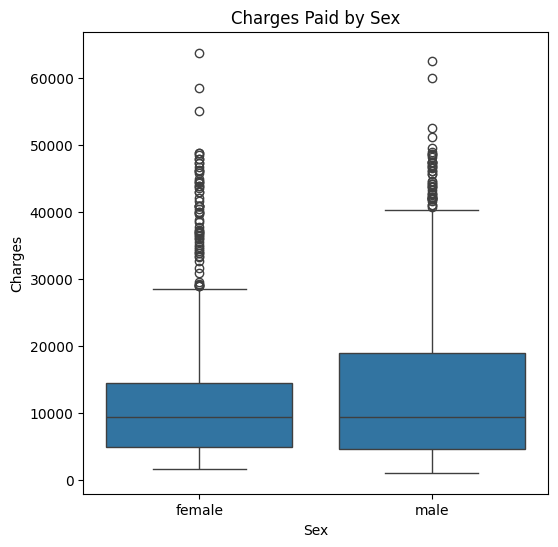

In [13]:
# Plot the distribution of age
plt.figure(figsize=(6, 6))
sns.boxplot(x='sex', y='charges', data=df_health)
plt.title('Charges Paid by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

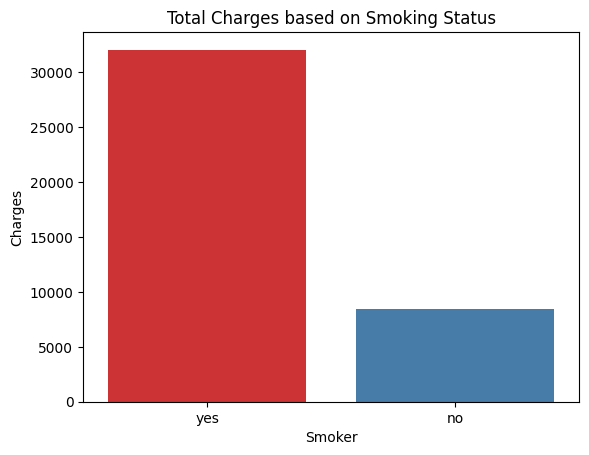

In [14]:
sns.barplot(data=df_health, x="smoker", y="charges", hue="smoker", ci=None, palette="Set1")
plt.title('Total Charges based on Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

Observations:
See that the smokers has more charges of the Medical than non-smokers.

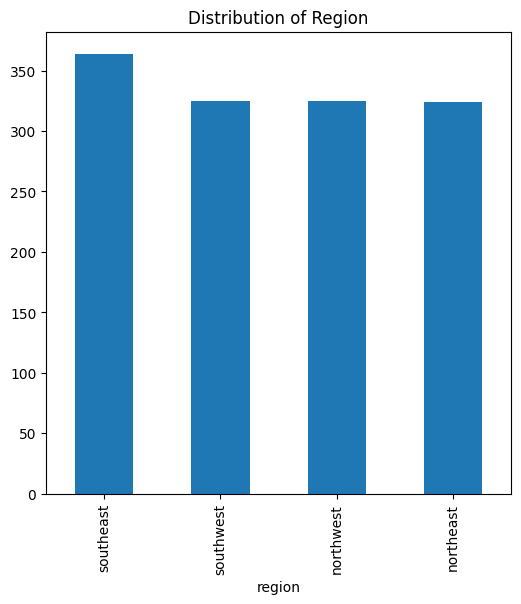

In [15]:
plt.figure(figsize=(6,6))
df_health["region"].value_counts().plot(kind='bar')
plt.title("Distribution of Region")
plt.show()

### How about the charges for each region

Text(0, 0.5, 'Charges')

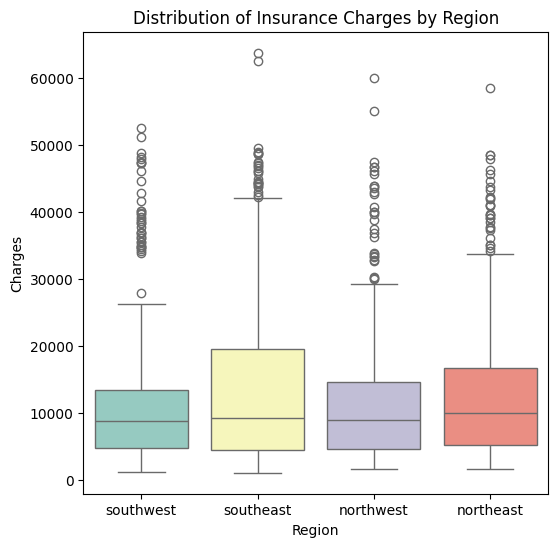

In [16]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='region', y='charges', data=df_health, palette='Set3')
plt.title('Distribution of Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')

Observations:
* Central Tendency: The boxplot provides a clear representation of the central tendency of insurance charges in each region. The horizontal line within each box represents the median charge for that region. \
(Note: We don't have talk about outliers because we're not going able to change the data before we get close into our ML models).
* Regional Comparison: Comparing the medians and overall distribution shapes for each region, if the median charge in the Southeast is noticeably higher than in other regions, it suggests that, on average, individuals in the Southeast region tend to incur higher insurance charges.

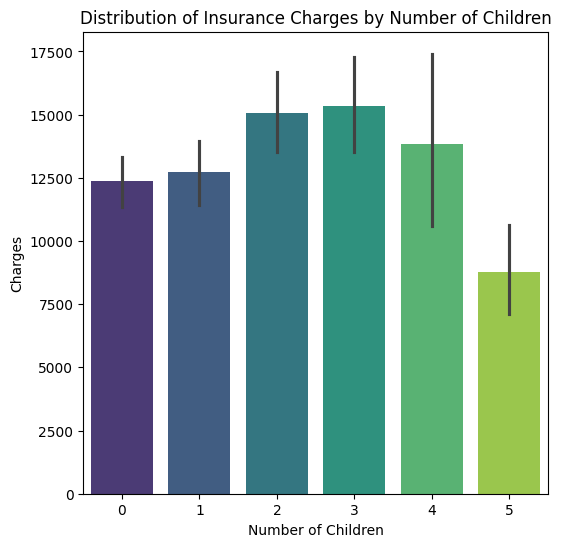

In [23]:
# Assuming df_health is your DataFrame
plt.figure(figsize=(6, 6))
sns.barplot(x='children', y='charges', data=df_health, palette='viridis')
plt.title('Distribution of Insurance Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

### We have to encode object data such as sex, smoker and region attributes

In [24]:
from sklearn.preprocessing import LabelEncoder

# i need [sex , smoker , region 
le = LabelEncoder()
df_health['sex'] = le.fit_transform(df_health['sex'])
df_health['smoker'] = le.fit_transform(df_health['smoker'])
df_health['region'] = le.fit_transform(df_health['region'])



        

### Correlation Matrix

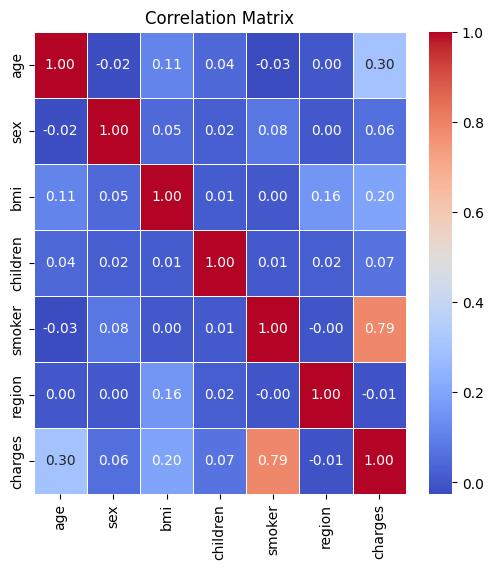

In [25]:
corr_matrix = df_health.corr()

plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Pairplot all Data

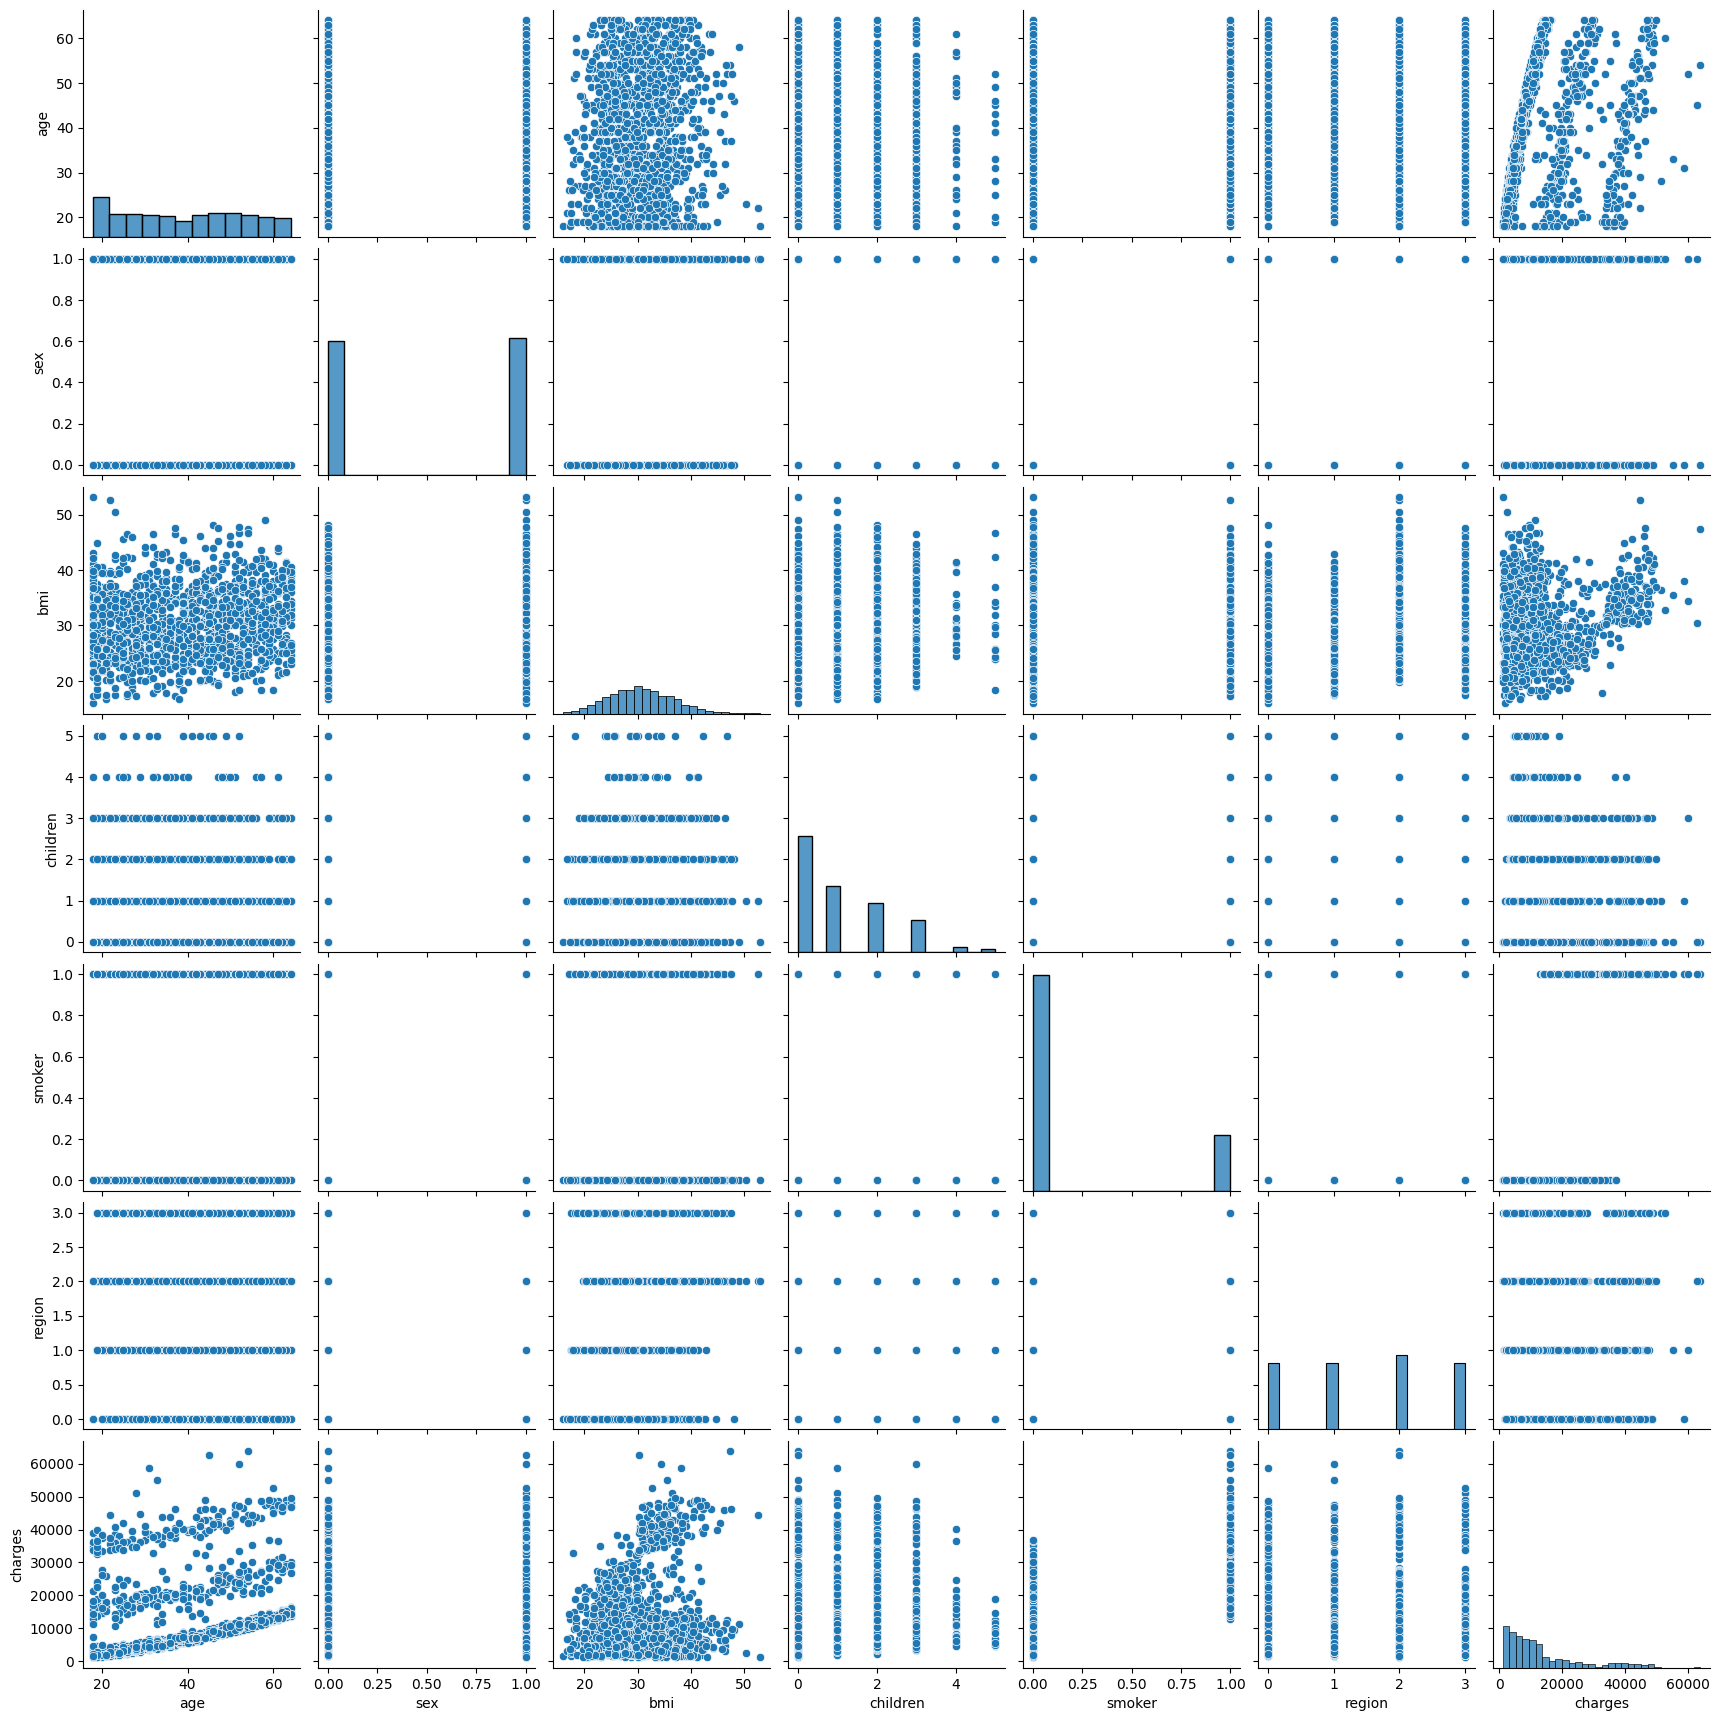

In [26]:
sns.pairplot(df_health)
plt.show()

### Scale the features and split the data

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

X = df_health.drop(['charges'],axis=1) 
y = df_health['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create the Model

In [28]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

### Predict on the test set

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict on the test set
y_pred_train = linear_model.predict(X_train)

# Evaluate the model
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

# Print the model score
print(f'R^2 Score Training: {r2_train:.4f}')
print(f'Mean Squared Error Training: {mse_train:.4f}')
print(f"Root Mean Squared Error Training: {rmse_train:.4f}")

R^2 Score Training: 0.7417
Mean Squared Error Training: 37280663.2226
Root Mean Squared Error Training: 6105.7893


In [30]:


# Predict on the test set
y_pred_test = linear_model.predict(X_test)

# Evaluate the model
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

# Print the model score
print(f'R^2 Score Test: {r2_test:.4f}')
print(f'Mean Squared Error Test: {mse_test:.4f}')
print(f"Root Mean Squared Error Test: {rmse_test:.4f}")

R^2 Score Test: 0.7833
Mean Squared Error Test: 33635210.4312
Root Mean Squared Error Test: 5799.5871


### How's the score of model?

In [31]:
print(f"Model Score = {linear_model.score(X_test, y_test)}")

Model Score = 0.7833463107364539


### Plotting the predicted values against the actual values

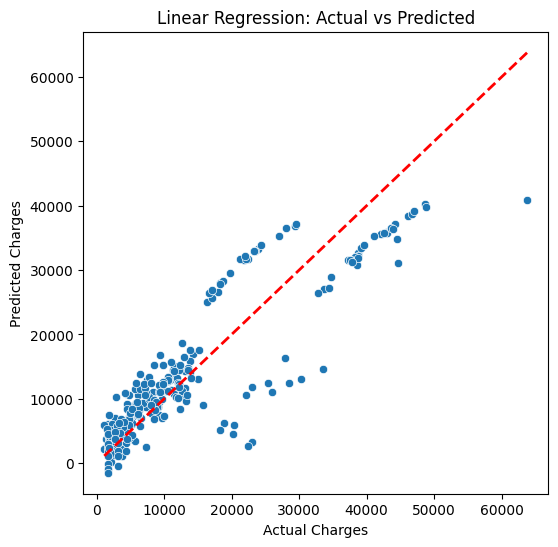

In [32]:
# Plotting the predicted values against the actual values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

Observations: \
It suggests that the linear regression model may be suffering from overfitting. Overfitting occurs when the model captures noise or random fluctuations in the training data, leading to poor generalization performance on unseen data.

### How about we can assign the Regularization using Ridge

Reference: https://medium.com/@keremkargin/ridge-regression-fundamentals-and-modeling-in-python-bb56f4301f62

In [33]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1).fit(X_train, y_train)

ridge_model.coef_

array([ 2.56851914e+02, -1.10521788e+01,  3.35794374e+02,  4.25541725e+02,
        2.35122105e+04, -2.71476626e+02])

In [34]:
ridge_model.intercept_

-11915.247940913856

In [35]:
# create a random set of alpha values to find the optimum alpha parameter

np.linspace(10, -2, 100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [36]:
# Let’s save the set as lambda_values.
lambda_values = 10**np.linspace(10,-2,100)*0.5

In [37]:
# Let's recreate the Ridge model
ridge_model = Ridge()
coef = []

for i in lambda_values:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train, y_train)
    coef.append(ridge_model.coef_)

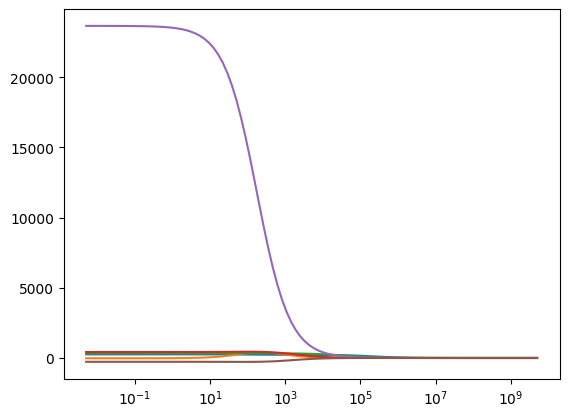

In [38]:
ax = plt.gca()
ax.plot(lambda_values, coef) 
ax.set_xscale("log")

In [39]:
# Let's see how the score is
ridge_model = Ridge(alpha=1).fit(X_train, y_train)

y_pred = ridge_model.predict(X_train)

# Evaluate the Ridge model
r2_ridge = r2_score(y_train, y_pred)
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
MSE = mean_squared_error(y_train, y_pred)

print(f'Ridge Model R^2 Score: {r2_ridge:.4f}')
print("Mean Square Error = ", MSE)
print("Root Mean Square Error = ", RMSE)

Ridge Model R^2 Score: 0.7417
Mean Square Error =  37283642.964802444
Root Mean Square Error =  6106.033324901072


In [40]:
from sklearn.model_selection import cross_val_score

np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

6142.014370455129

In [41]:
y_pred = ridge_model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

5803.084710238366

In [42]:
# Model Tuning
lambda_values1 = np.random.randint(0,1000,100)
lambda_values_2 = 10**np.linspace(10,-2,100)*0.5

In [43]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(alphas=lambda_values1, scoring = "neg_mean_squared_error", cv = 10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 26, 591, 802, 403, 313, 448, 370, 367, 637, 405, 656, 893, 327,
       788,  46, 837, 110, 213, 200, 717, 658, 276, 691, 329, 969, 590,
       582, 194, 828,  34, 345, 350, 669, 618,   2, 247, 659, 326, 366,
        38, 740, 151, 255, 800, 909, 686,  51, 841, 132, 287, 991, 305,
       261, 614,  47, 759, 287, 767, 237, 152, 419, 609,  11, 916, 784,
       271, 544, 301, 800, 870, 961, 906,  81, 193, 137, 579, 174, 755,
       406, 685, 884, 148, 522, 887, 896, 873, 445, 783, 238, 643, 985,
       243, 641, 196, 152, 909, 735, 280, 745, 120]),
        cv=10, scoring='neg_mean_squared_error')

In [44]:
# We find the optimum alpha value to use in the tuned model as follows.
opt_alpha= ridgecv.alpha_
print(opt_alpha)

2


In [45]:
# Initialize Ridge Regression model with regularization optimum alpha for Training model
ridge_model = Ridge(alpha=opt_alpha)

# Train the Ridge model
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge_train = ridge_model.predict(X_train)

# Evaluate the Ridge model
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)

# Print the Ridge model score
print(f'Ridge Model R^2 Score Training: {r2_ridge:.4f}')
print(f'Ridge Model Mean Squared Error Training: {mse_ridge_train:.4f}')
print(f"Ridge Model RMSE Training: {np.sqrt(mse_ridge_train)}")

Ridge Model R^2 Score Training: 0.7417
Ridge Model Mean Squared Error Training: 37292446.2229
Ridge Model RMSE Training: 6106.75414789678


In [46]:
# for Test model
# Predict on the test set
y_pred_ridge_test = ridge_model.predict(X_test)

# Evaluate the Ridge model
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test )

# Print the Ridge model score
print(f'Ridge Model R^2 Score Test: {r2_ridge_test:.4f}')
print(f'Ridge Model Mean Squared Error Test: {mse_ridge_test:.4f}')
print(f"Ridge Model RMSE Test: {np.sqrt(mse_ridge_test)}")

Ridge Model R^2 Score Test: 0.7828
Ridge Model Mean Squared Error Test: 33721739.9963
Ridge Model RMSE Test: 5807.042276086329


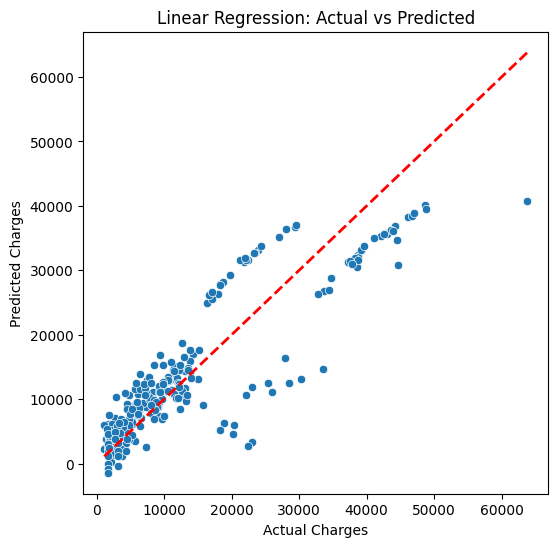

In [47]:
# Plotting the predicted values against the actual values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge_test)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()

In [48]:
from sklearn.linear_model import Lasso, LassoCV

lasso = Lasso(alpha=opt_alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=2)

In [64]:
r2_lasso_train = round(lasso.score(X_train, y_train)*100, 4)
r2_lasso_test = round(lasso.score(X_test, y_test)*100, 4)

print("R squared Lasso training set = ", r2_lasso_train)
print("R squared Lasso test set = ", r2_lasso_test)

R squared Lasso training set =  74.1705
R squared Lasso test set =  78.3293


In [65]:
y_pred_lasso_train = lasso.predict(X_train)
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
rmse_lasso_train = np.sqrt(mse_lasso_train)

y_pred_lasso_test = lasso.predict(X_test)
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
rmse_lasso_test = np.sqrt(mse_lasso_test)

print("MSE Lasso Training set = ", round(mse_train, 4))
print("MSE Lasso test set = ", round(mse_test, 4))

print("RMSE Lasso Training set = ", round(rmse_train, 4))
print("RMSE Lasso test set = ", round(rmse_test, 4))

MSE Lasso Training set =  37280713.2804
MSE Lasso test set =  33643493.5456
RMSE Lasso Training set =  6105.7934
RMSE Lasso test set =  5800.3012


In [68]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

params = {'objective': 'reg:linear', 'eval_metric': 'rmse', 'learning_rate': 0.1, 'max_depth': 5, 'alpha': opt_alpha}
xg_reg = xgb.train(params=params, dtrain=dtrain, num_boost_round=100)
preds = xg_reg.predict(dtest)
# rmse = np.sqrt(mean_squared_error(y_test, preds))
r2_xgb = r2_score(y_test, preds)
rmse = mean_squared_error(y_test, preds, squared=False)
print("R^2: %f" % (r2_xgb))
print("RMSE: %f" % (rmse))

R^2: 0.876920
RMSE: 4371.264800


In [ ]:
# Conclusion
# The best model is XGBoost with alpha = 2 with the RMSE of 0.43.

In [62]:
# Let's create Minimization for GBM
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

gbm.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=42)

In [66]:
# Make predictions
y_pred_gbm = gbm.predict(X_test)
r2_gbm = r2_score(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)
print("RMSE: %f" % (rmse_gbm))

RMSE: 4655.125351


In [69]:
# Create comparison table of all results from all models

models = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'XGBoost', 'Gradient Boosting'],
    'RMSE': [rmse_test, np.sqrt(mse_ridge_test), np.sqrt(mse_lasso_test), rmse, rmse_gbm],
    'R^2': [r2_test, r2_ridge, r2_lasso_test, r2_xgb, r2_gbm],
})

print(models)

               Model         RMSE        R^2
0  Linear Regression  5800.301160  78.329300
1   Ridge Regression  5807.042276   0.741684
2   Lasso Regression  5800.301160  78.329300
3            XGBoost  4371.264800   0.876920
4  Gradient Boosting  4655.125351   0.860416
